In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import glob
from sklearn import svm


import os

In [12]:
# MAKE SURE datapath IS CORRECT
datapath = "Classifier recordings/"
print(len(glob.glob(datapath+"*.csv")))
subjects = ["bradley", "johnathan", "vishal", "parker"] # there are no control files for bradley
count = 0

df_task = []
df_control = []

for subj in subjects:
    subj_files = glob.glob(datapath+"{}*.csv".format(subj))
    for f in subj_files:
        count+=1
        
        task_type = f.split("/")[-1].split("_")[1] # nback or control
        
        print(task_type)
        temp = pd.read_csv(f, skiprows=1)

        if task_type == "nback":
            if len(df_task):
                df_task = pd.concat([df_task, temp], axis=0)
            else:
                df_task = temp
        elif task_type == "control":
            if len(df_control):
                df_control = pd.concat([df_control, temp], axis=0)
            else:
                df_control = temp
        else:
            print ('warning')
            # TODO: warning

31
nback
nback
nback
nback
nback
nback
nback
nback
nback
control
nback
control
nback
control
nback
nback
nback
nback
nback
nback
nback
nback 6.csv
warning
control 
warning
control
nback
control
control
nback
control
nback
control


In [16]:
print(df_task.shape)
df_task.head()

(10377, 17)


,EEG.AF3,EEG.F7,EEG.F3,EEG.FC5,EEG.FC6,EEG.F4,EEG.F8,EEG.AF4,POW.AF3.BetaL,POW.F7.BetaL,POW.F3.BetaL,POW.FC5.BetaL,POW.FC6.BetaL,POW.F4.BetaL,POW.F8.BetaL,POW.AF4.BetaL,Label
Timestamp,,,,,,,,,,,,,,,,,
1.606347e+09,4261.922852,4245.128418,4261.410156,4185.128418,4082.692383,4207.948730,4179.230957,4222.948730,0.744153,0.481056,1.337582,0.726708,1.664790,0.585336,2.607686,1.141444,1
1.606347e+09,4251.153809,4231.538574,4244.487305,4191.666504,4069.102539,4176.794922,4166.794922,4182.051270,0.720756,0.575257,1.262424,0.658854,1.313202,0.488109,2.043995,0.993759,1
1.606347e+09,4259.358887,4249.871582,4256.538574,4198.205078,4092.564209,4192.692383,4174.871582,4196.794922,0.658691,0.730373,1.115967,0.573975,1.006133,0.445407,1.474507,0.902910,1
1.606347e+09,4251.282227,4243.589844,4264.743652,4200.897461,4105.897461,4186.025879,4186.282227,4187.307617,0.589745,0.906508,0.924485,0.498324,0.840869,0.439948,1.060365,0.856381,1
1.606347e+09,4239.102539,4223.205078,4259.102539,4177.179688,4147.948730,4215.384766,4246.410156,4213.461426,0.538910,1.038350,0.733125,0.448582,0.861780,0.462991,0.895547,0.852771,1


In [17]:
print(df_control.shape)
df_control.head()

(11870, 17)


,EEG.AF3,EEG.F7,EEG.F3,EEG.FC5,EEG.FC6,EEG.F4,EEG.F8,EEG.AF4,POW.AF3.BetaL,POW.F7.BetaL,POW.F3.BetaL,POW.FC5.BetaL,POW.FC6.BetaL,POW.F4.BetaL,POW.F8.BetaL,POW.AF4.BetaL,Label
Timestamp,,,,,,,,,,,,,,,,,
1.606531e+09,4217.179688,4224.743652,4216.282227,4235.256348,4215.256348,4214.743652,4198.846191,4203.333496,0.426337,0.545178,0.772897,0.674927,1.109506,0.947318,0.970705,0.804906,0
1.606531e+09,4227.948730,4220.641113,4223.589844,4230.384766,4219.358887,4227.948730,4205.256348,4218.333496,0.368807,0.591951,0.722954,0.651642,0.963155,0.858517,0.789880,0.777624,0
1.606531e+09,4239.743652,4235.128418,4227.436035,4243.333496,4231.282227,4232.436035,4216.922852,4230.769043,0.330303,0.629097,0.608999,0.559272,0.747226,0.723144,0.598801,0.714288,0
1.606531e+09,4240.384766,4240.512695,4231.922852,4239.615234,4203.589844,4218.846191,4187.179688,4218.205078,0.312097,0.635927,0.473857,0.435232,0.514337,0.579802,0.438180,0.630831,0
1.606531e+09,4234.102539,4231.153809,4216.153809,4233.589844,4216.538574,4205.641113,4201.282227,4215.769043,0.315047,0.624519,0.366603,0.332054,0.324814,0.473402,0.349232,0.549052,0


In [15]:
# df_task = pd.read_csv("Data/Parker/parker new nback 1_27.11.20_18.01.15.md.bp.csv", skiprows=1)
# df_control = pd.read_csv("Data/Parker/parker control 2_25.11.20_19.19.36.md.pm.bp.csv", skiprows=1)

df_task.dropna(subset=["POW.AF4.Alpha"], inplace=True)
df_control.dropna(subset=["POW.AF4.Alpha"], inplace=True)

# df_task.head()

df_task = df_task.filter(regex="Timestamp|EEG.AF|EEG.F|BetaL")
df_task = df_task.filter(regex="Timestamp|EEG.AF|EEG.F|POW.F|POW.AF")
# df_task['Timestamp'] = df_task['Timestamp']-df_task['Timestamp'].iloc[0]
df_task.set_index("Timestamp", inplace=True)
df_task["Label"] = 1

df_control = df_control.filter(regex="Timestamp|EEG.AF|EEG.F|BetaL")
df_control = df_control.filter(regex="Timestamp|EEG.AF|EEG.F|POW.F|POW.AF")
# df_control['Timestamp'] = df_control['Timestamp']-df_control['Timestamp'].iloc[0]
df_control.set_index("Timestamp", inplace=True)
df_control["Label"] = 0

In [22]:
# shuffle task and no task data
df_all = pd.concat([df_task, df_control])
df_all = df_all.sample(frac=1.0)

# normalize data
df_all_data = df_all.iloc[:, :-1]
df_all_labels = df_all.iloc[:,-1:]
df_all_data = (df_all_data - df_all_data.mean()) / df_all_data.std()

# put labels back on normalized data
df_all = pd.concat([df_all_data, df_all_labels], axis=1)

# Split into train/val sets
X_train = df_all.iloc[:int(0.7*len(df_all)), :-1].to_numpy()
Y_train = df_all.iloc[:int(0.7*len(df_all)), -1].to_numpy()

X_val = df_all.iloc[int(0.7*len(df_all)):, :-1].to_numpy()
Y_val = df_all.iloc[int(0.7*len(df_all)):, -1].to_numpy()

print(X_train.shape)
print(Y_train.shape)

print(X_val.shape)
print(Y_val.shape)

df_all.head()

(15572, 16)
(15572,)
(6675, 16)
(6675,)


,EEG.AF3,EEG.F7,EEG.F3,EEG.FC5,EEG.FC6,EEG.F4,EEG.F8,EEG.AF4,POW.AF3.BetaL,POW.F7.BetaL,POW.F3.BetaL,POW.FC5.BetaL,POW.FC6.BetaL,POW.F4.BetaL,POW.F8.BetaL,POW.AF4.BetaL,Label
Timestamp,,,,,,,,,,,,,,,,,
1.606531e+09,-0.015524,0.363948,-0.201815,-0.087117,-0.040181,-0.079942,-0.085935,-0.026135,0.027629,-0.035876,-0.091418,-0.074503,-0.079995,-0.071347,-0.033777,-0.064408,0
1.606509e+09,-0.196024,-0.052086,-0.237598,-0.097107,-0.079085,-0.419853,-0.207777,-0.341286,0.031013,-0.040181,0.073737,-0.032796,-0.023878,0.034142,-0.015610,-0.001713,1
1.606531e+09,0.054416,0.104066,0.243888,0.038461,0.079969,0.070590,0.105656,0.157372,-0.039668,-0.061617,-0.058995,-0.030141,-0.047430,-0.025969,-0.062397,-0.035441,1
1.606531e+09,-2.260514,-0.609768,-0.725575,-0.592278,-0.138015,-0.313022,-0.251925,-0.391151,-0.024328,-0.084693,-0.094950,-0.076221,-0.073813,-0.017785,-0.055106,0.057605,1
1.606599e+09,-0.299813,-0.168081,-0.234339,-0.142771,0.062232,-0.130930,0.063276,-0.091961,0.007191,-0.042915,-0.068485,-0.040843,-0.081332,-0.034759,-0.053970,-0.007484,0


In [27]:
clf = svm.SVC()

clf.fit(X_train, Y_train)

clf.score(X_val, Y_val, sample_weight=None)

0.698876404494382

In [7]:
# def get_model(input_shape):
#    x_input = Input(input_shape)
#    x = Dense(32, activation="relu")(x_input)
#    x = Dense(1, activation="sigmoid")(x)
#    model = Model(inputs=x_input, outputs=x)
#    return model

In [8]:
#model = get_model(X_train.shape[1]) # create an instance of the model
#model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 16)]              0         
_________________________________________________________________
dense (Dense)                (None, 32)                544       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________


In [9]:
# model.compile(optimizer="adam", loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0.5)])

In [10]:
# history = model.fit(x=X_train,
#                   y=Y_train,
#                    validation_data=(X_val, Y_val),
#                    batch_size=32,
#                    verbose=0, # set to 0 for no epoch updates; 1 for updates
#                    epochs=100)

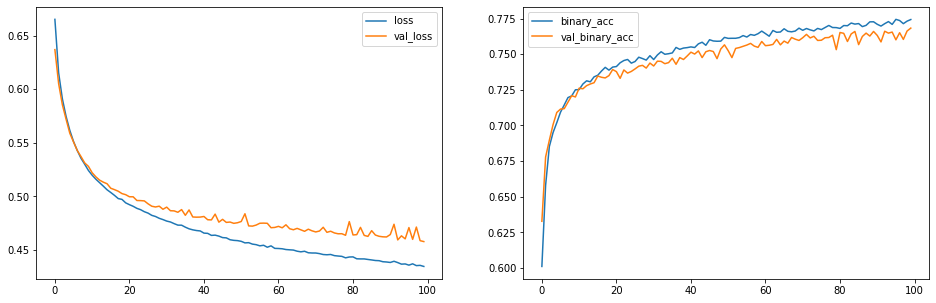

In [11]:
#loss = history.history["loss"]
#val_loss = history.history["val_loss"]
#binary_acc = history.history["binary_accuracy"]
#val_binary_acc = history.history["val_binary_accuracy"]

#fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 5))

#ax1.plot(loss)
#ax1.plot(val_loss)
#ax1.legend(["loss","val_loss"]);

#ax2.plot(binary_acc)
#ax2.plot(val_binary_acc)
#ax2.legend(["binary_acc", "val_binary_acc"]);